In [1]:
import flaremodel as fm
import numpy as np
import matplotlib.pyplot as plt
SAVE_PLOT = True

In [2]:
e_dist = "powerlaw"
B = 20. # Gauss, Will be modified if there is expansion
t_esc = 1e99 # Escape timescale (s), 1e99 (large number) to disable
dt = 0.1 # Time resolution

g_min = 50.
g_max = 4e5
p = 2.

R = fm.SgrA().Rs # size of the sphere, will be modified if there is expansion
V = 4/3.*np.pi*R**3
total_inj = (10**6)*V # electrons
t_inj = 5*60. # injection timescale in (s)
p_inj = 15.*60.

e_pl_fun = lambda gamma, ne, p: np.piecewise(gamma, [np.logical_and(gamma > p[1], gamma < p[2])],
                                            [lambda gamma: fm.eDist(gamma, ne, p, "powerlaw"), 0.]) 
e_bkpl_fun = lambda gamma, ne, p: np.piecewise(gamma, [gamma > p[3]],
                                            [lambda gamma: fm.eDist(gamma, ne, p, "bknpowerlawexpcutoff"), 0.])

# Expected gamma max or break with fixed B field after time t
gamma_after_t = lambda B, t: 7.7e8/(B**2*t)

In [3]:
ne_temp = fm.GaussianInjectionEdist(t_inj, p_inj, t_esc, g_max=1e6, g_steps=50)
ne_temp.e_dist_inj_fun = lambda gamma, N_e: e_pl_fun(gamma, N_e, [p, g_min, g_max])

In [4]:
ne_t = ne_temp.get_ngamma(np.array([5, 10, 15, 20, 25, 30])*60, total_inj, B, dt)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


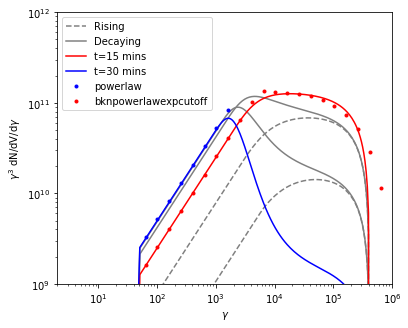

In [5]:
plt.figure(figsize=(6,5))

plt.loglog(ne_temp._gamma, ne_t[0,:]*ne_temp._gamma**3/V, color="gray", linestyle='--', label="Rising")
plt.loglog(ne_temp._gamma, ne_t[1,:]*ne_temp._gamma**3/V, color="gray", linestyle='--')
plt.loglog(ne_temp._gamma, ne_t[3,:]*ne_temp._gamma**3/V, color="gray", linestyle='-', label="Decaying")
plt.loglog(ne_temp._gamma, ne_t[4,:]*ne_temp._gamma**3/V, color="gray", linestyle='-')

plt.loglog(ne_temp._gamma, ne_t[2,:]*ne_temp._gamma**3/V, color="red", linestyle='-', label="t=15 mins")
plt.loglog(ne_temp._gamma, ne_t[5,:]*ne_temp._gamma**3/V, color="blue", linestyle='-', label="t=30 mins")

plt.plot(ne_temp._gamma[::10], (e_pl_fun(ne_temp._gamma, total_inj/V, 
                [p, g_min, gamma_after_t(B, t_inj*3)])*ne_temp._gamma**3)[::10], 'b.', label="powerlaw")

plt.plot(ne_temp._gamma[::10], (e_bkpl_fun(ne_temp._gamma, total_inj/V*0.5, 
                [p, p+1, gamma_after_t(B, t_inj*2.35/2.), g_min, g_max/1.5])*ne_temp._gamma**3)[::10], 'r.',
        label="bknpowerlawexpcutoff")

plt.legend()
plt.ylabel(r"$\gamma^3$ dN/dV/d$\gamma$")
plt.xlabel(r"$\gamma$")
plt.xlim([2, 1e6])
plt.ylim([1e9, 1e12])
if SAVE_PLOT: plt.savefig("SyncCool.eps", bbox_inches="tight", dpi=300)